In [1]:
import numpy as np
import matplotlib as mpl
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath, physics}")
plt.rc("font", family="serif", serif=["Computer Modern"])
plt.rc("axes", titlesize=18, labelsize=16)
plt.rc("figure", titlesize=20)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

# 12.2.14

In [2]:
def lozi(x, y, a, b):
    return 1 + y - a * np.abs(x), b * x

C:\Users\SLHHe\AppData\Local\Temp\ipykernel_22440\2576564694.py:47: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


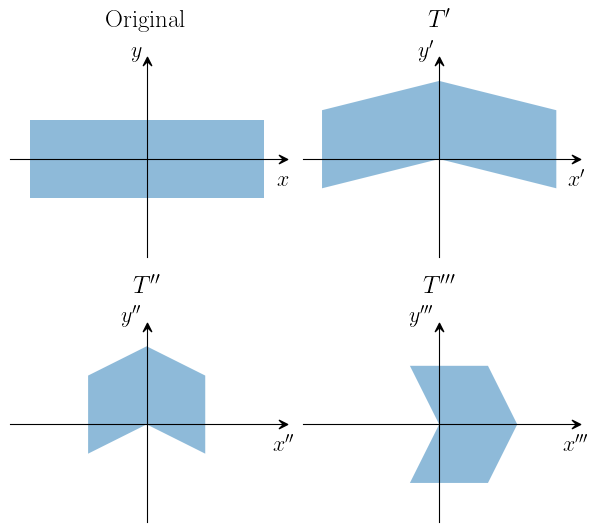

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(6.0, 5.7),
                        layout="constrained")

xarrow_vertices = [[0.0, 0.0], [-1.0, -1.0], [1.0, 0.0],
                   [-1.0, 1.0], [0.0, 0.0]]
yarrow_vertices = [[0.0, 0.0], [-1.0, -1.0], [0.0, 1.0],
                   [1.0, -1.0], [0.0, 0.0]]
xarrow_path = mpl.path.Path(xarrow_vertices, closed=True)
yarrow_path = mpl.path.Path(yarrow_vertices, closed=True)

for i in range(4):
    ax = axs.flat[i]
    ax.set_aspect("equal")
    ax.set_xlim([-3.5, 3.5])
    ax.set_ylim([-2.5, 2.5])

    # remove all ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([], minor=True)
    
    # center axes
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.spines[["top", "right"]].set_visible(False)

    # draw arrowheads for axes
    ax.plot(1.0, 0, color="k", clip_on=False, marker=xarrow_path,
            transform=ax.get_yaxis_transform())
    ax.plot(0, 1.0, color="k", clip_on=False, marker=yarrow_path,
            transform=ax.get_xaxis_transform())

    ax.set_xlabel("$x" + "'" * i + "$", labelpad=8, x=1, ha="center")
    ax.set_ylabel("$y" + "'" * i + "$", loc="top", rotation=0)
    ax.set_title("$T" + "'" * i + "$", pad=25)
axs[0, 0].set_title("Original", pad=25)

x = np.array([-3.0, 0.0, 3.0, 3.0, 0.0, -3.0])
y = np.array([1.0, 1.0, 1.0, -1.0, -1.0, -1.0])
xnew, ynew = lozi(x, y, 0.25, 0.5)

axs[0, 0].fill(x, y, alpha=0.5)
axs[0, 1].fill(x, xnew, alpha=0.5)
axs[1, 0].fill(ynew, xnew, alpha=0.5)
axs[1, 1].fill(xnew, ynew, alpha=0.5)

fig.tight_layout()
plt.savefig("12.2.14.pdf", bbox_inches="tight")
plt.show()

# 12.2.18

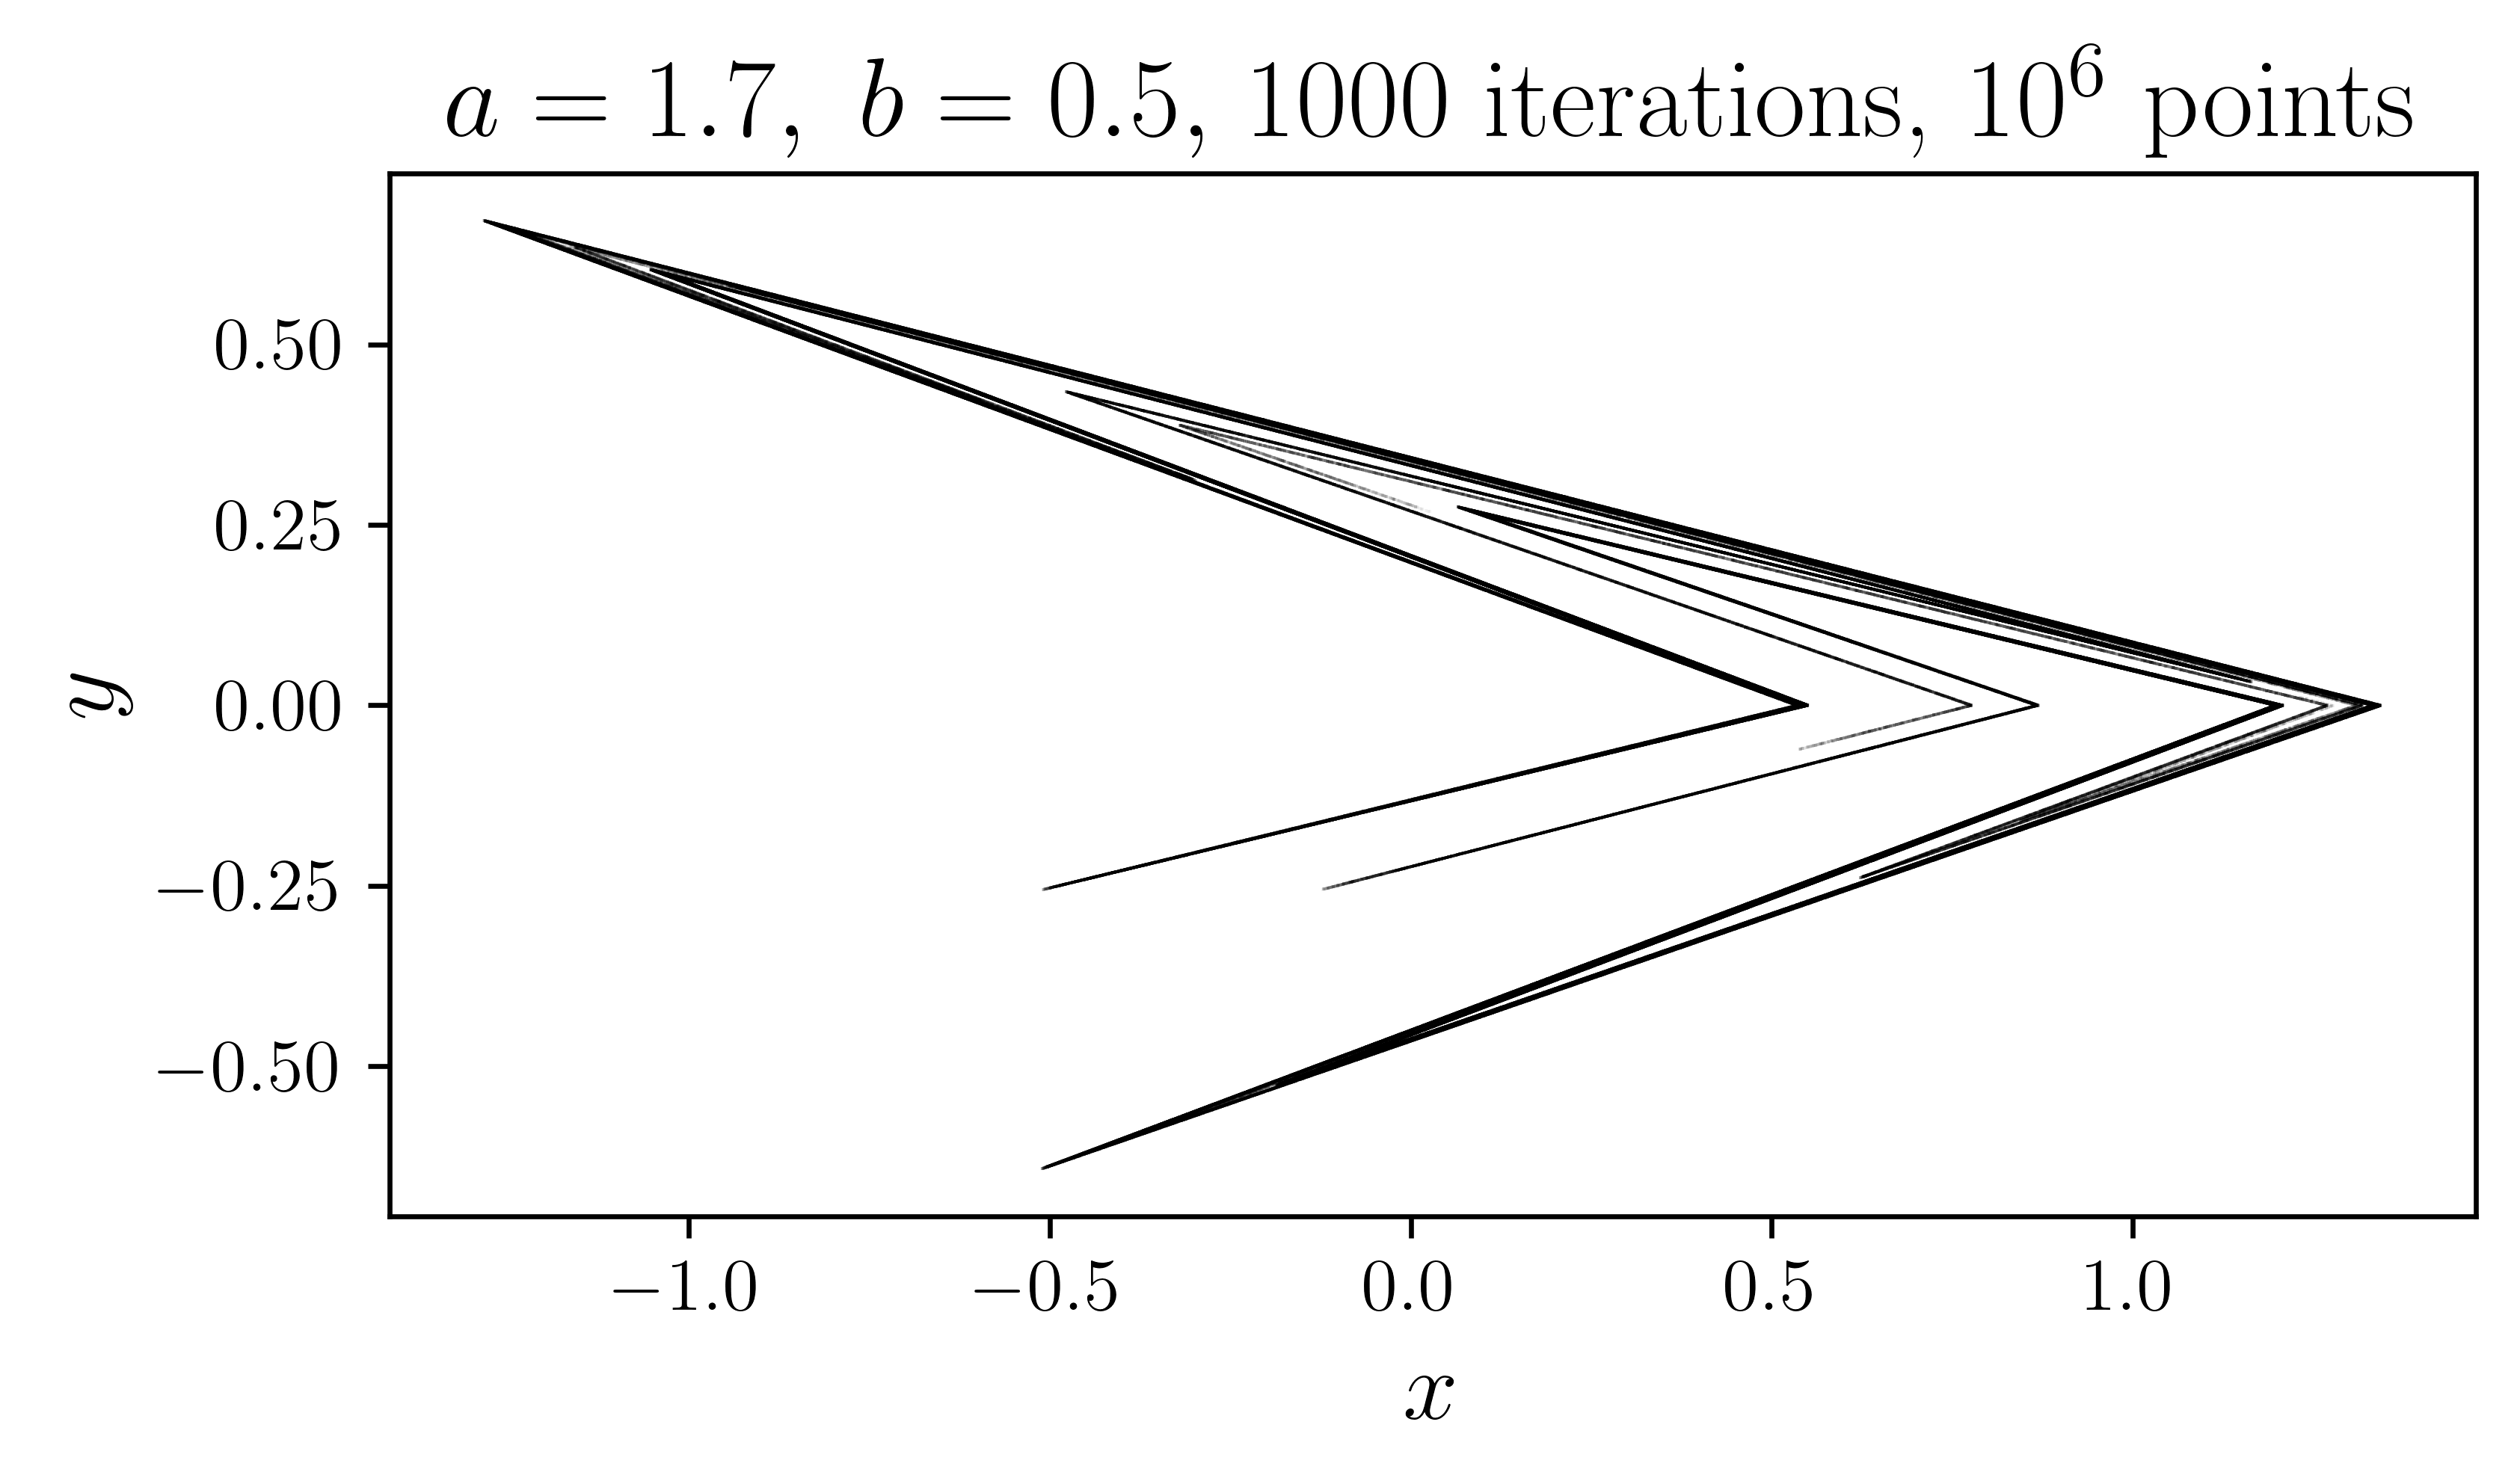

In [61]:
a, b = 1.7, 0.5
xs, ys = np.mgrid[-0.1:0.1:1000j, -0.1:0.1:1000j]
for _ in range(1000):
    xs, ys = lozi(xs, ys, a, b)

fig, ax = plt.subplots(dpi=600, figsize=(6, 4))
ax.scatter(xs.flat, ys.flat, 200 / fig.dpi, lw=0,
           color="k", marker=",", alpha=0.05)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title(fr"$a={a},\ b={b},$ 1000 iterations, $10^6$ points")
ax.set_aspect("equal")
plt.savefig("12.2.18.png", bbox_inches="tight", dpi=600)
plt.show()

# 12.3.1

In [2]:
def rossler(t, x, a, b, c):
    return -x[1] - x[2], x[0] + a * x[1], b + x[2] * (x[0] - c)

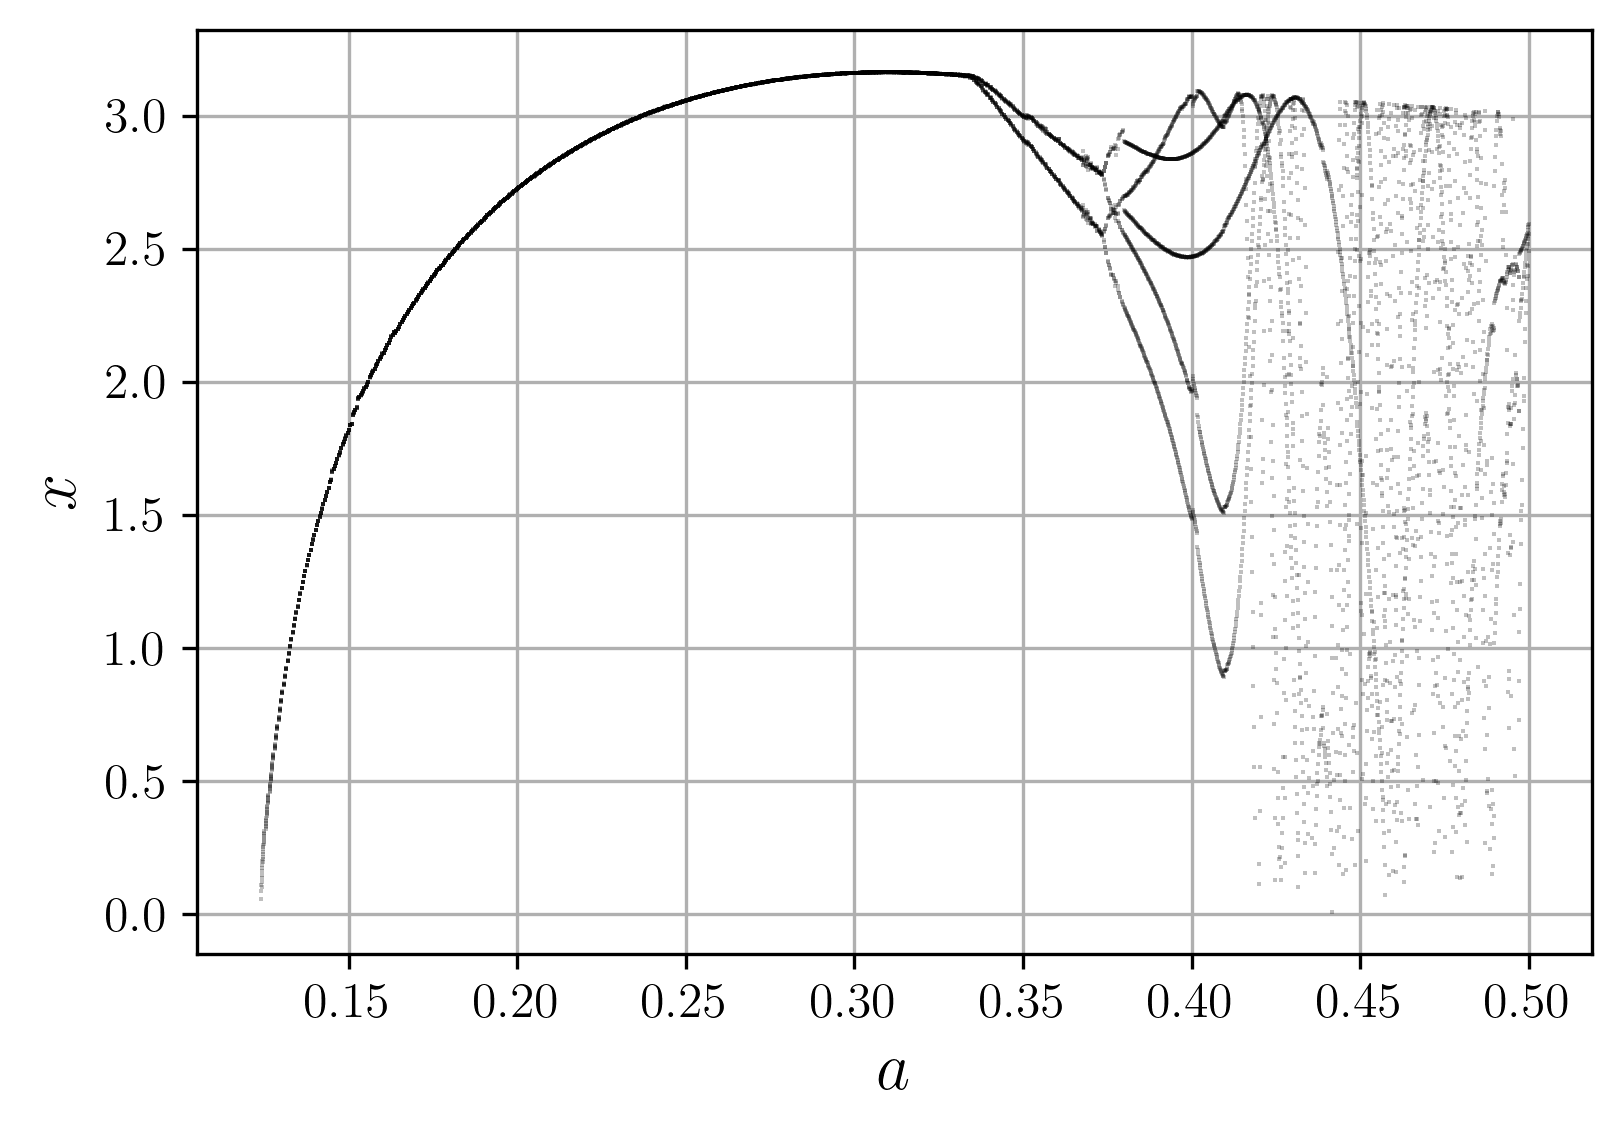

In [18]:
fig, ax = plt.subplots(dpi=300, figsize=(6, 4))
ax.set_xlabel("$a$")
ax.set_ylabel("$x$")
ax.grid()

b, c = 2, 4
a_vals = np.linspace(0.0, 0.38, 1000, endpoint=False)
for a in a_vals:
    sol = solve_ivp(rossler, (0, 500), (-2.7, 0, 0), args=(a, b, c),
                    dense_output=True)
    t = np.linspace(450, 500, 50000)
    x, y, z = sol.sol(t)

    xs = x[np.where(np.diff(np.sign(y)))[0]]
    xs = xs[xs > 0]
    ax.scatter(a * np.ones(len(xs)), xs,  200 / fig.dpi,
               lw=0, color="k", marker=",", alpha=0.25, zorder=4)

# Chaotic values take much longer to calculate,
# and simulation for a shorter time is sufficient
a_vals = np.linspace(0.38, 0.5, 1000)
for a in a_vals:
    sol = solve_ivp(rossler, (0, 50), (-2.7, 0, 0), args=(a, b, c),
                    dense_output=True)
    t = np.linspace(20, 50, 30000)
    x, y, z = sol.sol(t)

    xs = x[np.where(np.diff(np.sign(y)))[0]]
    xs = xs[xs > 0]
    ax.scatter(a * np.ones(len(xs)), xs,  200 / fig.dpi,
               lw=0, color="k", marker=",", alpha=0.25, zorder=4)

plt.savefig("12.3.1.bifurcation.png", bbox_inches="tight", dpi=300)
plt.show()

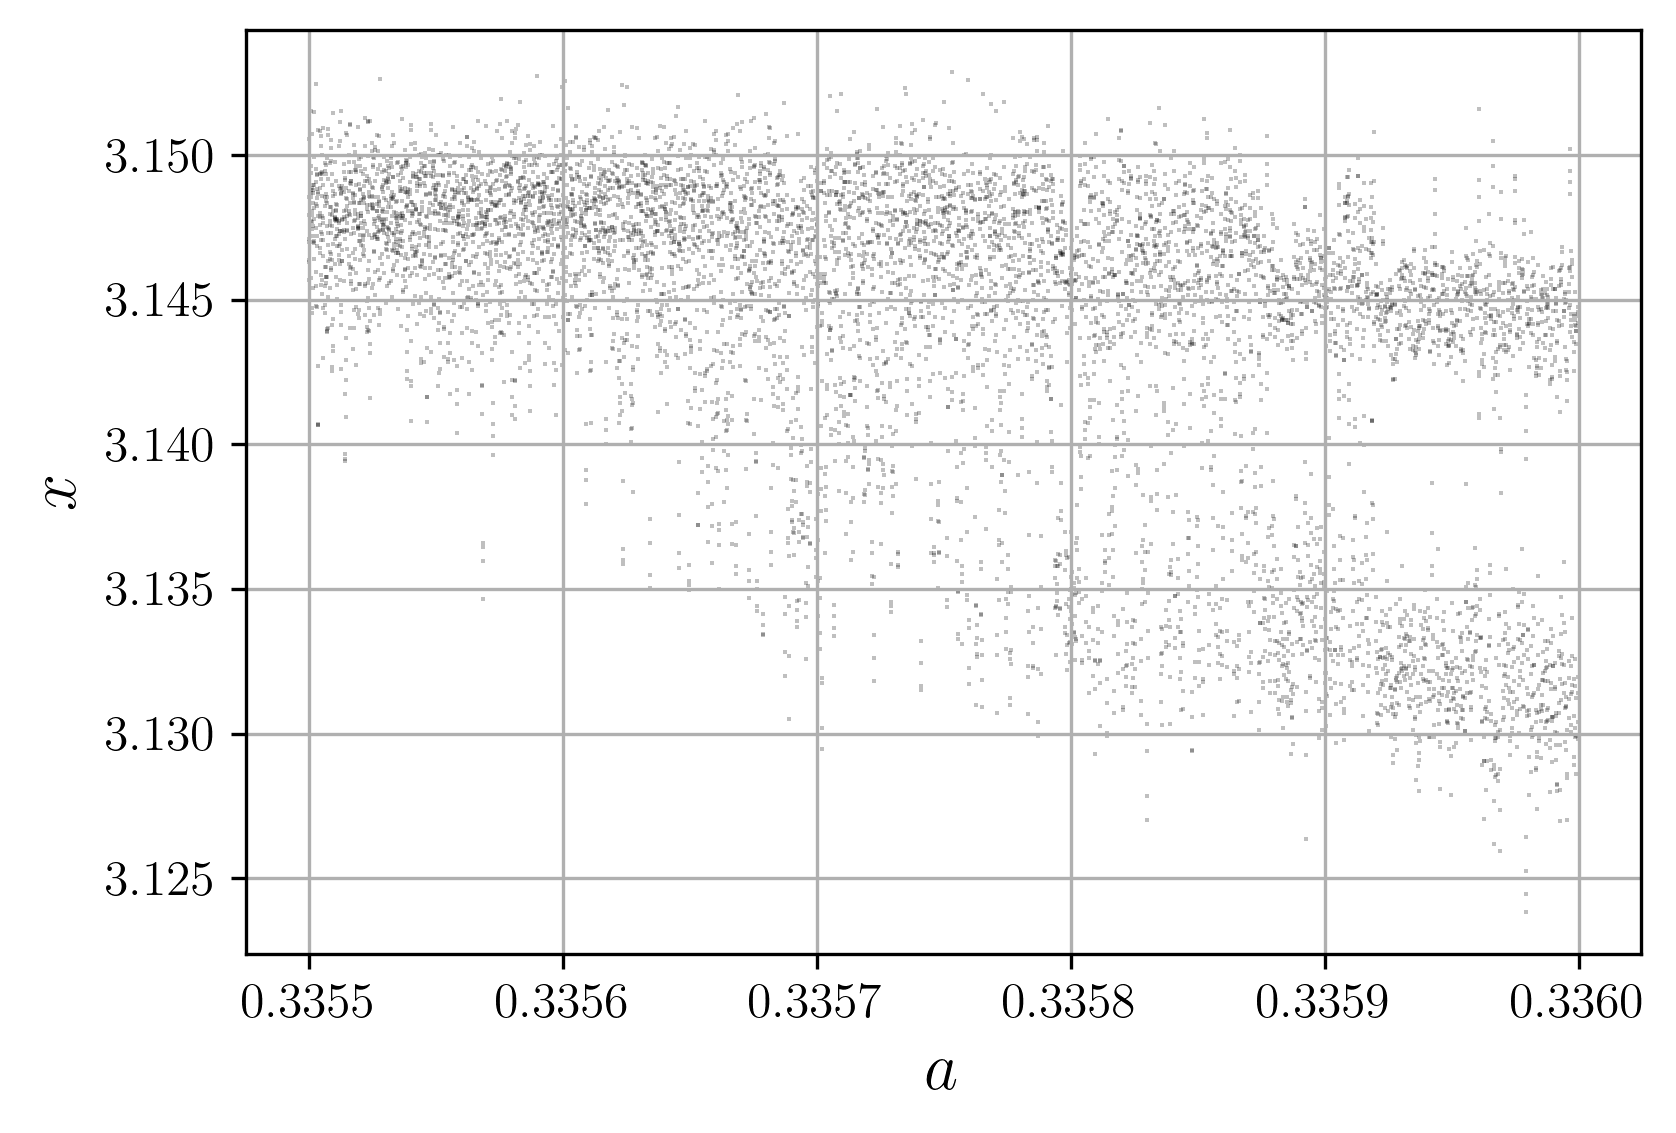

In [5]:
fig, ax = plt.subplots(dpi=300, figsize=(6, 4))
ax.set_xlabel("$a$")
ax.set_ylabel("$x$")
ax.grid()

b, c = 2, 4
a_vals = np.linspace(0.3355, 0.336, 1000, endpoint=False)
for a in a_vals:
    sol = solve_ivp(rossler, (0, 1000), (-2.7, 0, 0), args=(a, b, c),
                    dense_output=True)
    t = np.linspace(950, 1000, 50000)
    x, y, z = sol.sol(t)

    xs = x[np.where(np.diff(np.sign(y)))[0]]
    xs = xs[xs > 0]
    ax.scatter(a * np.ones(len(xs)), xs,  200 / fig.dpi,
               lw=0, color="k", marker=",", alpha=0.25, zorder=4)

plt.savefig("12.3.1.zoom.hopf.png", bbox_inches="tight", dpi=300)
plt.show()

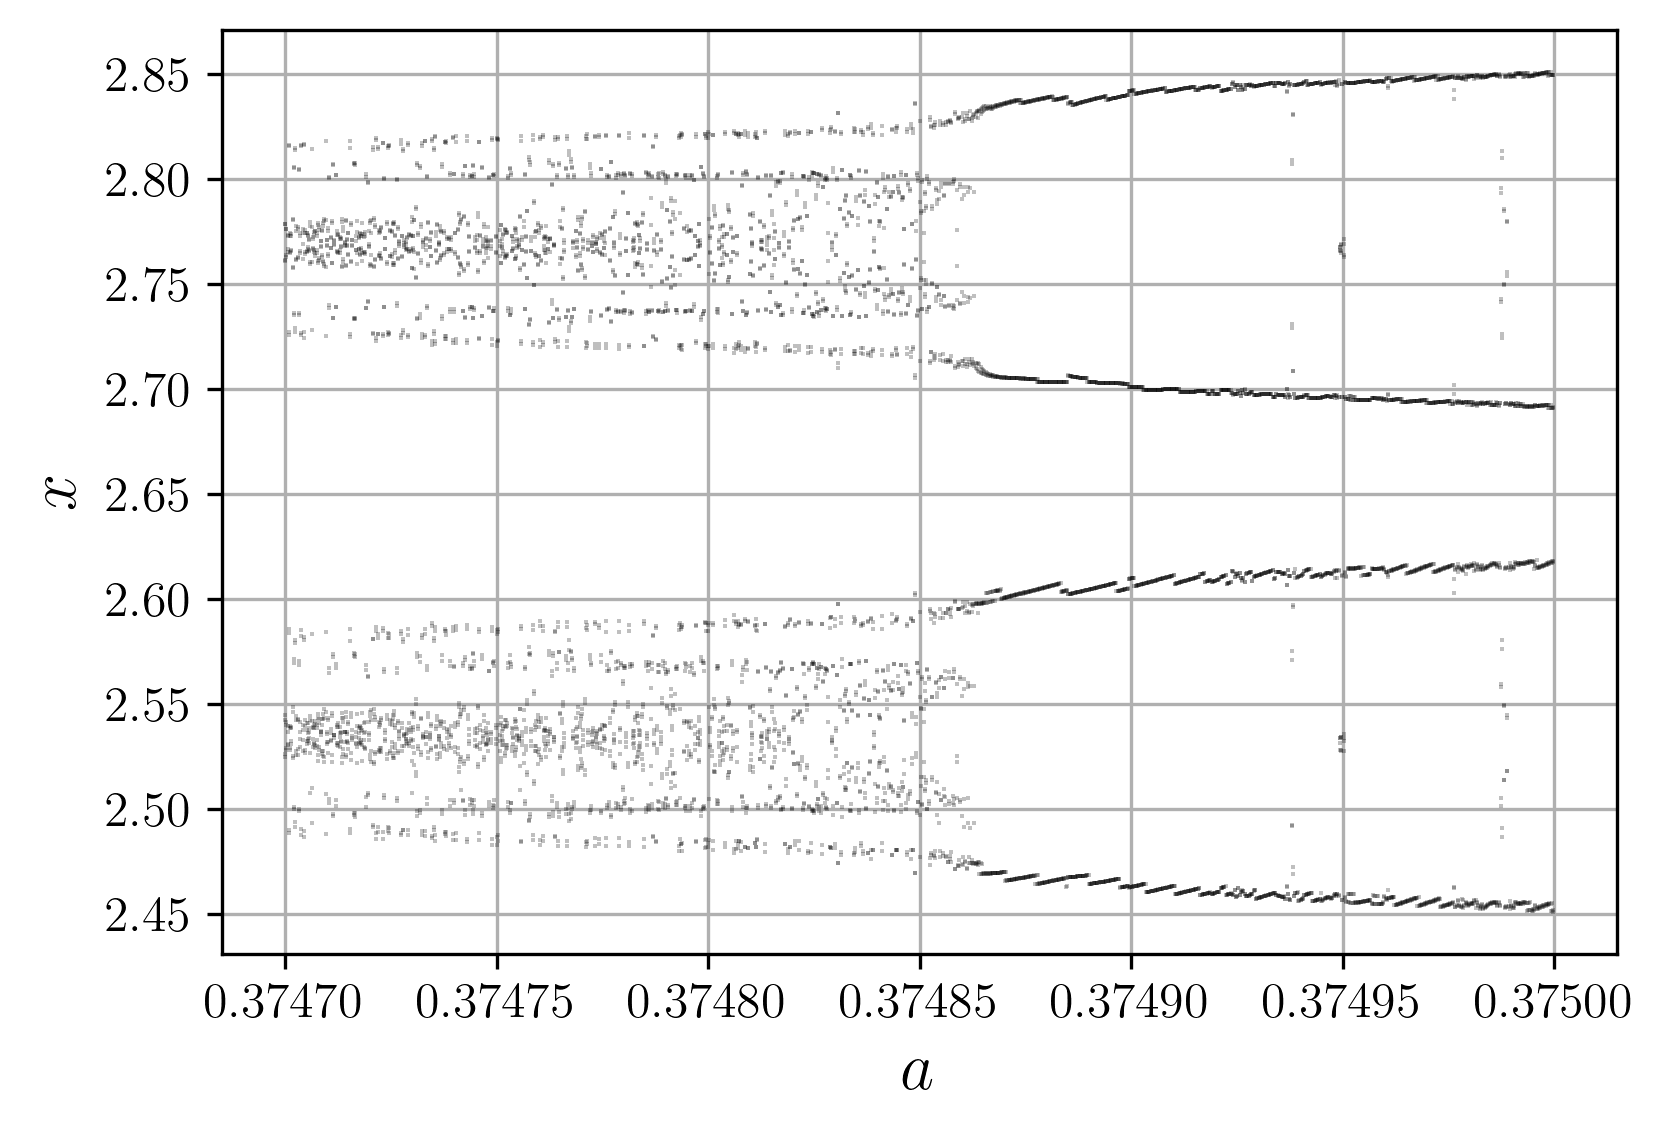

In [17]:
fig, ax = plt.subplots(dpi=300, figsize=(6, 4))
ax.set_xlabel("$a$")
ax.set_ylabel("$x$")
ax.grid()

b, c = 2, 4
a_vals = np.linspace(0.3747, 0.375, 1000, endpoint=False)
for a in a_vals:
    sol = solve_ivp(rossler, (0, 1000), (-2.7, 0, 0), args=(a, b, c),
                    dense_output=True)
    t = np.linspace(950, 1000, 50000)
    x, y, z = sol.sol(t)

    xs = x[np.where(np.diff(np.sign(y)))[0]]
    xs = xs[xs > 0]
    ax.scatter(a * np.ones(len(xs)), xs,  200 / fig.dpi,
               lw=0, color="k", marker=",", alpha=0.25, zorder=4)

plt.savefig("12.3.1.zoom.double.png", bbox_inches="tight", dpi=300)
plt.show()

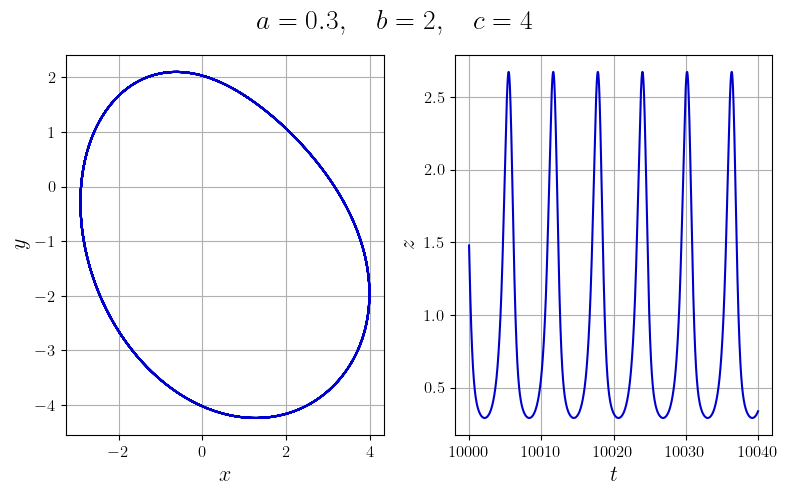

In [63]:
a, b, c = 0.3, 2, 4
sol = solve_ivp(rossler, (0, 10040), (5, 0, 0), args=(a, b, c),
                dense_output=True)
t = np.linspace(10000, 10040, 10000)
x, y, z = sol.sol(t)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].plot(x, y, color="mediumblue")
axs[1].plot(t, z, color="mediumblue")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$z$")
axs[0].grid()
axs[1].grid()
fig.suptitle(fr"$a={a},\quad b={b},\quad c={c}$")

plt.tight_layout()
plt.savefig("12.3.1.normal.pdf", bbox_inches="tight")
plt.show()

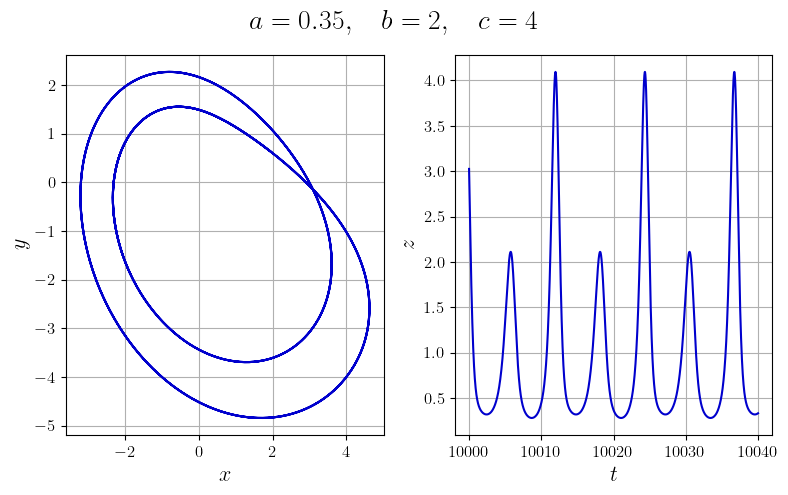

In [64]:
a, b, c = 0.35, 2, 4
sol = solve_ivp(rossler, (0, 10040), (5, 0, 0), args=(a, b, c),
                dense_output=True)
t = np.linspace(10000, 10040, 10000)
x, y, z = sol.sol(t)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].plot(x, y, color="mediumblue")
axs[1].plot(t, z, color="mediumblue")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$z$")
axs[0].grid()
axs[1].grid()
fig.suptitle(fr"$a={a},\quad b={b},\quad c={c}$")

plt.tight_layout()
plt.savefig("12.3.1.hopf.pdf", bbox_inches="tight")
plt.show()

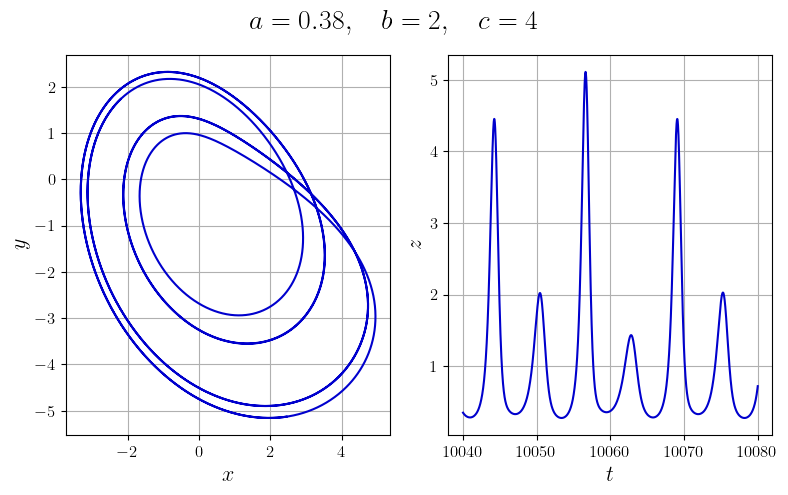

In [68]:
a, b, c = 0.38, 2, 4
sol = solve_ivp(rossler, (0, 10080), (5, 0, 0), args=(a, b, c),
                dense_output=True)
t = np.linspace(10040, 10080, 10000)
x, y, z = sol.sol(t)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].plot(x, y, color="mediumblue")
axs[1].plot(t, z, color="mediumblue")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$z$")
axs[0].grid()
axs[1].grid()
fig.suptitle(fr"$a={a},\quad b={b},\quad c={c}$")

plt.tight_layout()
plt.savefig("12.3.1.double.pdf", bbox_inches="tight")
plt.show()